### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : ripple_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/ripple_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.205110,0.218674,0.190232,0.215189,"242,636,000","7,864,700,000"
1,2017-09-04,0.228781,0.228781,0.195960,0.204968,"239,613,000","8,772,340,000"
2,2017-09-03,0.227229,0.236443,0.218662,0.228811,"186,526,000","8,712,840,000"
3,2017-09-02,0.249348,0.249680,0.217774,0.226669,"329,928,000","9,560,940,000"
4,2017-09-01,0.255803,0.256162,0.243833,0.248479,"283,576,000","9,808,460,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2017-09-05 to 2013-08-04
Data columns (total 6 columns):
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1494 non-null object
Market Cap    1494 non-null object
dtypes: float64(4), object(2)
memory usage: 81.7+ KB


- The data frame has 1494 entries and 6 columns. 
- All columns has 1494 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume        145
Market Cap      0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.
- There is null data in Volume

Solution:
- Convert to float number
- Using interpolation to fill the missing data

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2017-09-05 to 2013-08-04
Data columns (total 6 columns):
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1349 non-null float64
Market Cap    1494 non-null int64
dtypes: float64(5), int64(1)
memory usage: 121.7 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1494.000000,1494.000000,1494.000000,1494.000000,1.349000e+03,1.494000e+03
mean,0.027803,0.029456,0.026254,0.027934,2.111592e+07,9.496100e+08
std,0.063325,0.067624,0.059060,0.063490,9.559944e+07,2.456712e+09
min,0.002809,0.003082,0.002802,0.002810,8.316000e+03,2.196030e+07
25%,0.005974,0.006084,0.005894,0.005982,2.725070e+05,1.413848e+08
50%,0.007478,0.007698,0.007296,0.007484,6.042140e+05,2.292110e+08
75%,0.012785,0.013157,0.011890,0.012859,1.642070e+06,2.852108e+08
max,0.394931,0.435170,0.332222,0.394132,1.770400e+09,1.512820e+10


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
df1.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume        145
Market Cap      0
dtype: int64

In [11]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Volume'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-12-31,0.027675,0.027738,0.027022,0.027330,63621.0,216359000
2013-12-30,0.027055,0.027750,0.026985,0.027460,72634.0,211515000
2013-12-29,0.027311,0.027535,0.026627,0.027218,56772.0,213518000
2013-12-28,0.027554,0.028106,0.026629,0.027303,143404.0,215413000
2013-12-27,0.024427,0.027123,0.023527,0.027076,148422.0,190964000


In [12]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.995909,0.996778,0.994731,0.628818,0.998464
High,0.995909,1.000000,0.994105,0.997938,0.665021,0.994452
Low,0.996778,0.994105,1.000000,0.996637,0.618890,0.995252
Close,0.994731,0.997938,0.996637,1.000000,0.647339,0.993267
Volume,0.628818,0.665021,0.618890,0.647339,1.000000,0.629679
Market Cap,0.998464,0.994452,0.995252,0.993267,0.629679,1.000000


In the data frame above, we can inferred that Volume has a relationship with High

Let's plot data between Market Cap and other variable, then see the relation between the data

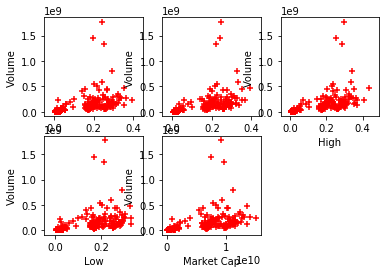

In [14]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Volume')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df['Volume'],'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df['Volume'],'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df['Volume'],'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df['Volume'],'Low')
plt.subplot(2,3,5)
plot_data(new_df['Market Cap'], new_df['Volume'],'Market Cap')

In [15]:
from sklearn import linear_model

model    = linear_model.LinearRegression()
x        = new_df[['High']]
y        = new_df['Volume']

In [16]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Model Score
model.score(x, y)

0.44225280175522086

In [18]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['High']]
y = model.predict(x) 
df1['Volume Predict'] = y.astype('int64')
df1[df1['Volume'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Volume Predict
Date,,,,,,,
2013-12-26,0.022097,0.024891,0.022097,0.024385,NaN,172756000,15541183
2013-12-25,0.022600,0.022600,0.021434,0.022042,NaN,176680000,13485145
2013-12-24,0.023698,0.024124,0.022305,0.022575,NaN,185269000,14852846
2013-12-23,0.021571,0.023965,0.021485,0.023702,NaN,168640000,14710152
2013-12-22,0.021571,0.023839,0.020959,0.021716,NaN,168637000,14597075


#### 4. Data Visualization

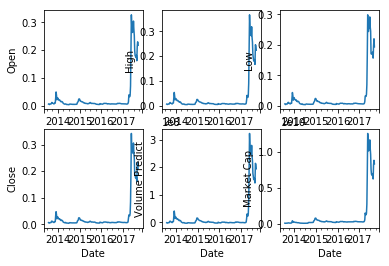

In [19]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume Predict')
df1['Volume Predict'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()